In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
home_values_dataset = pd.read_csv('homevalue.csv')
income = pd.read_csv('median_income.csv')
home_values_dataset.columns.values[5:] = pd.to_datetime(home_values_dataset.columns[5:])
home_values_dataset.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-30 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
0,102001,0,United States,country,NaN,119729.572640,119940.215341,120201.443305,120761.726012,121406.544234,...,350165.829700,351570.606154,352120.860853,352265.907749,352504.359843,352945.853239,353522.496915,354005.575460,354711.020713,355327.955070
1,394913,1,"New York, NY",msa,NY,214911.652349,215824.905614,216746.617250,218614.361683,220548.475724,...,647851.001125,652477.077381,655536.133683,658263.386724,661979.750511,665977.942675,669477.234967,672228.240789,673999.838327,675063.976036
2,753899,2,"Los Angeles, CA",msa,CA,218489.647448,219302.706154,220385.692595,222540.471813,224897.124751,...,911031.498845,916863.716873,920777.178084,925109.643477,930243.585193,936603.517696,941773.674116,946228.303841,950210.062120,950740.494586
3,394463,3,"Chicago, IL",msa,IL,150432.480390,150571.737044,150836.953795,151496.747161,152290.399220,...,311972.006665,314053.134292,315253.946820,315976.493240,316881.631507,317866.656523,318826.563429,319846.118364,321070.725716,322389.516129
4,394514,4,"Dallas, TX",msa,TX,125268.936932,125324.732154,125388.874474,125555.445340,125775.064467,...,372240.198836,372383.086130,371723.001722,370790.474579,370143.446717,369946.958796,369841.800601,369555.460608,369035.088390,368515.900537


In [4]:

print("\nBefore dropping missing values:")
print("New shape for home_values:", home_values_dataset.shape)

threshold = 0.4
home_values = home_values_dataset.loc[home_values_dataset.isnull().mean(axis=1) < threshold]



print("\nAfter dropping missing values:")
print("New shape for home_values:", home_values.shape)


def explore_df(df, name):
    print(f"\n{'='*30}\n{name} Summary\n{'='*30}")
    print("Shape:", df.shape)
    print("\nColumn Names:\n", df.columns.tolist())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nFirst 5 Rows:\n", df.head())
    print("\nSummary Statistics:\n", df.describe(include='all'))
    


explore_df(home_values, "Zillow Data")
explore_df(income, "Median Income Data")


Before dropping missing values:
New shape for home_values: (895, 306)

After dropping missing values:
New shape for home_values: (771, 306)

Zillow Data Summary
Shape: (771, 306)

Column Names:
 ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', Timestamp('2000-01-31 00:00:00'), Timestamp('2000-02-29 00:00:00'), Timestamp('2000-03-31 00:00:00'), Timestamp('2000-04-30 00:00:00'), Timestamp('2000-05-31 00:00:00'), Timestamp('2000-06-30 00:00:00'), Timestamp('2000-07-31 00:00:00'), Timestamp('2000-08-31 00:00:00'), Timestamp('2000-09-30 00:00:00'), Timestamp('2000-10-31 00:00:00'), Timestamp('2000-11-30 00:00:00'), Timestamp('2000-12-31 00:00:00'), Timestamp('2001-01-31 00:00:00'), Timestamp('2001-02-28 00:00:00'), Timestamp('2001-03-31 00:00:00'), Timestamp('2001-04-30 00:00:00'), Timestamp('2001-05-31 00:00:00'), Timestamp('2001-06-30 00:00:00'), Timestamp('2001-07-31 00:00:00'), Timestamp('2001-08-31 00:00:00'), Timestamp('2001-09-30 00:00:00'), Timestamp('2001-10-31 00

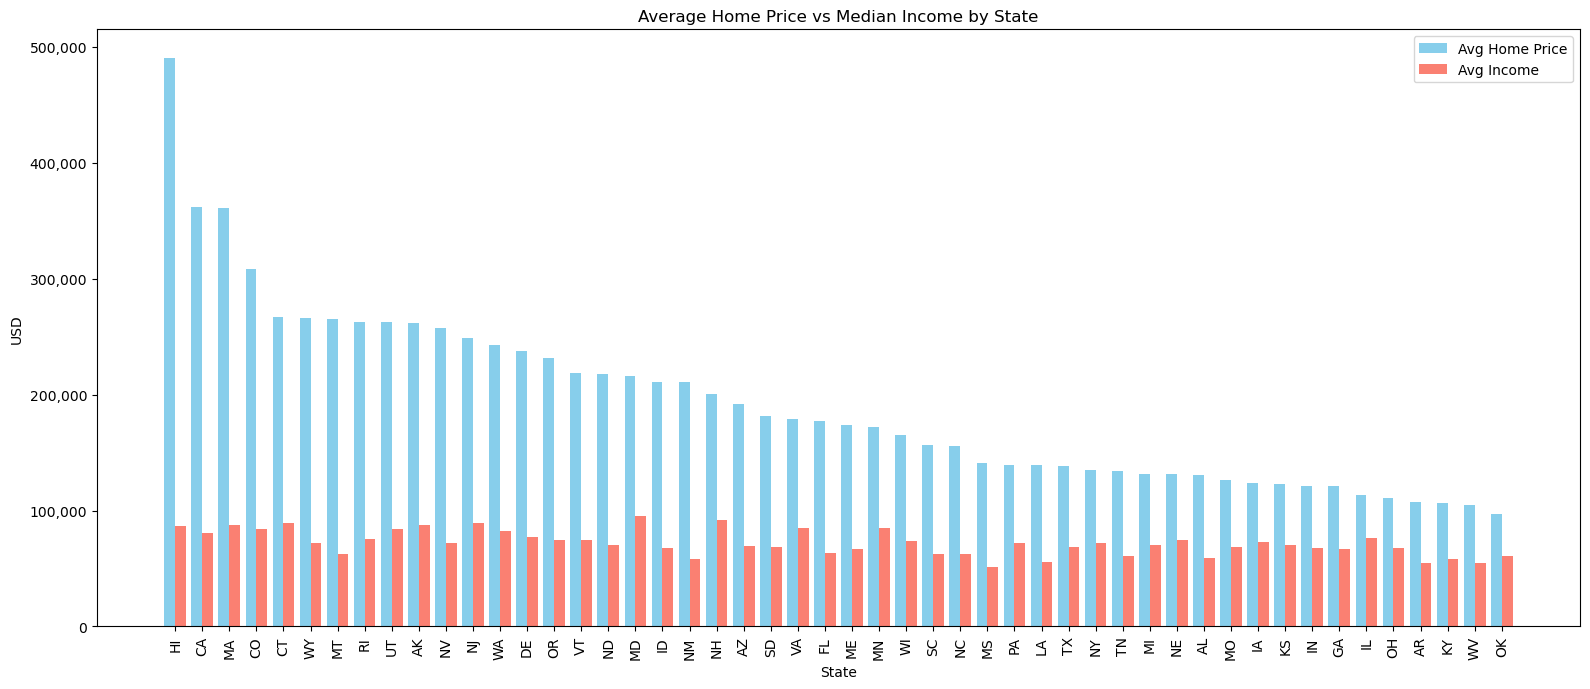

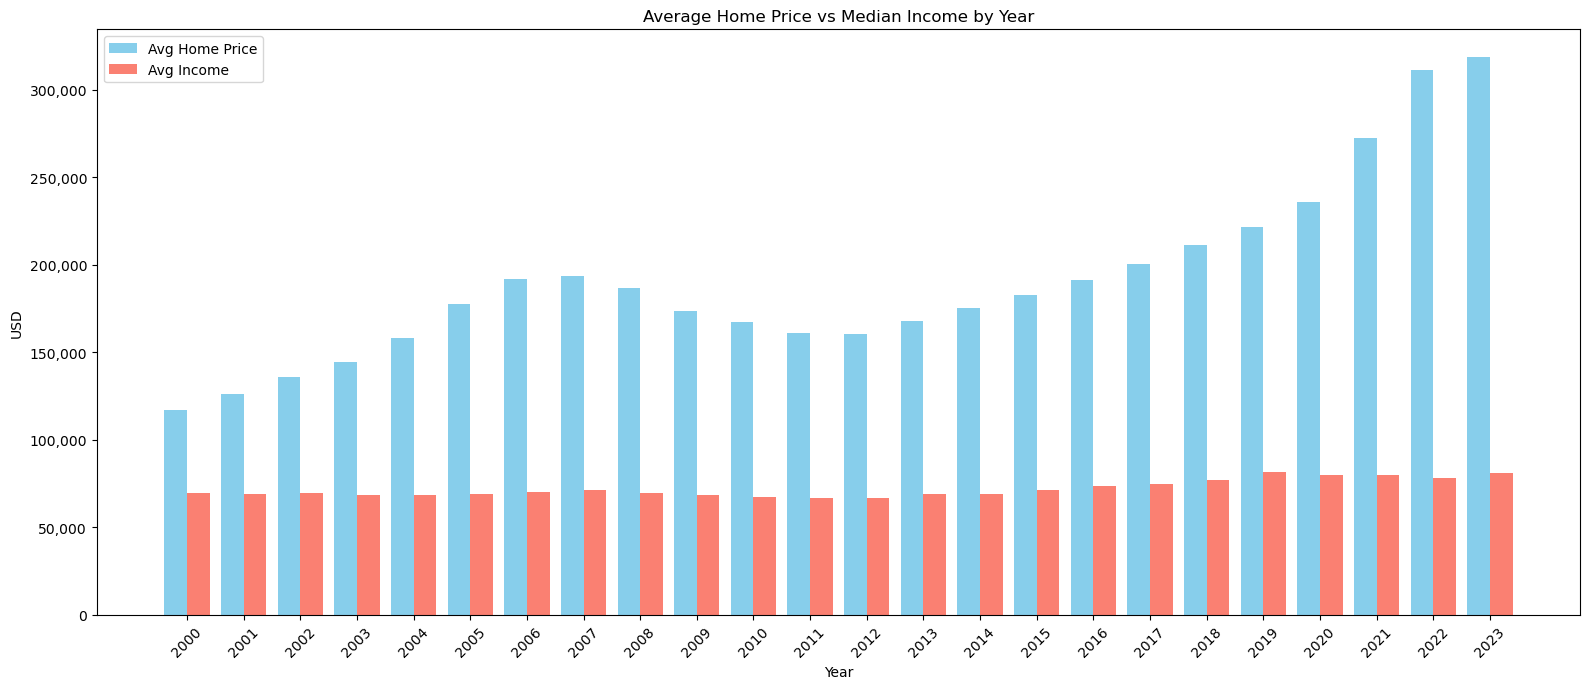

In [5]:
#========================VISUALIZATIONS===========================
#Description:
#Graph 1: This graph shows how much people earn on average (income) compared 
#to how much homes cost in each U.S. state.
#In most states, home prices are much higher than what people earn in a year 
#especially in places like Hawaii, California, and Washington, where homes are very expensive.

#Graph2:This graph shows how income and home prices have changed over time from 2000 to 2023.
#Home prices have gone up a lot over the years, while income has grown more slowly 
#making it harder for people to afford homes today compared to the past.

#CLEANING INCOME DATA
# remove dollar signs and commas, convert to float
for col in income.columns[1:]:
    income[col] = income[col].replace(r'[\$,]', '', regex=True).astype(float)

# reshape income data from wide (one year per column) to long format
income1 = income.melt(id_vars='State', var_name='Year', value_name='MedianIncome')
income1['Year'] = income1['Year'].astype(int)  # Ensure year is numeric

# conversion of state name tto abbrevations so it matches zillow
state_nm = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# keep only states that match and convert to the abbrevation
income1 = income1[income1['State'].isin(state_nm)]
income1['State'] = income1['State'].map(state_nm)

# CLEANING HOME VALUES
# select only date columns
price_c = home_values.columns[5:]

# Zillow data into long format: one row per region and date
zillow1 = home_values.melt(
    id_vars=['StateName', 'RegionName'],
    value_vars=price_c,
    var_name='Date',
    value_name='HomePrice'
)

# extract year from the date column
zillow1['Year'] = pd.to_datetime(zillow1['Date'], format='%Y-%m-%d').dt.year

# group by state and year to get average annual home price
state_year_P = zillow1.groupby(['StateName', 'Year'])['HomePrice'].mean().reset_index()
state_year_P.rename(columns={'StateName': 'State'}, inplace=True)

# merge Datasets 
data_merge = pd.merge(state_year_P, income1, on=['State', 'Year'])


# Bar Graph 1, By State 
# get average income and home price by state across all years
state_avg = data_merge.groupby('State')[['MedianIncome', 'HomePrice']].mean().reset_index()
state_avg_sorted = state_avg.sort_values('HomePrice', ascending=False)
year_avg = data_merge.groupby('Year')[['MedianIncome', 'HomePrice']].mean().reset_index()

y_max = max(
    state_avg_sorted['HomePrice'].max(),
    state_avg_sorted['MedianIncome'].max(),
    year_avg['HomePrice'].max(),
    year_avg['MedianIncome'].max()
) * 1.1  
plt.figure(figsize=(16, 7))
bar_width = 0.4
x = range(len(state_avg_sorted))

# home Price and Income side by side
plt.bar(x, state_avg_sorted['HomePrice'], width=bar_width, label='Avg Home Price', color='skyblue')
plt.bar([i + bar_width for i in x], state_avg_sorted['MedianIncome'], width=bar_width, label='Avg Income', color='salmon')

plt.xticks([i + bar_width / 2 for i in x], state_avg_sorted['State'], rotation=90)
plt.title('Average Home Price vs Median Income by State')
plt.xlabel('State')
plt.ylabel('USD')
#plt.ylim(0, y_max)  
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

# Bar Graph 2, By Year 
# get  average per year
year_avg = data_merge.groupby('Year')[['MedianIncome', 'HomePrice']].mean().reset_index()

plt.figure(figsize=(16, 7))
bar_width = 0.4
x = range(len(year_avg))

plt.bar(x, year_avg['HomePrice'], width=bar_width, label='Avg Home Price', color='skyblue')
plt.bar([i + bar_width for i in x], year_avg['MedianIncome'], width=bar_width, label='Avg Income', color='salmon')

plt.xticks([i + bar_width / 2 for i in x], year_avg['Year'], rotation=45)
plt.title('Average Home Price vs Median Income by Year')
plt.xlabel('Year')
plt.ylabel('USD')
#plt.ylim(0, y_max)  
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


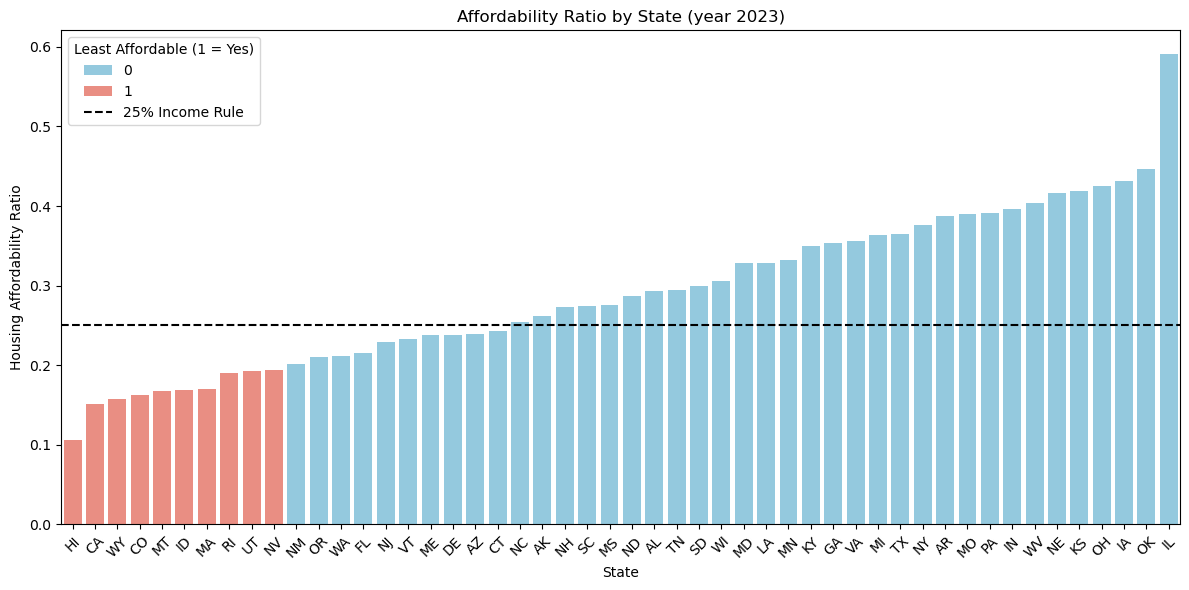

In [6]:
#=========================BINARY CLASSIFICATION(ML)=======================
# DESCRIPTION 
#This is a binary classification task This graph shows how affordable 
#it is to buy a home in each U.S. state in 2023. For each state
#the bar represents the Affordability Ratio
#which is calculated by dividing the average incomee by 
#the average home price. A higher ratio means homes are more affordable 
#you earn more compared to how much the home costs, and a lower ratio 
#means homes are less affordable.
#The bars are colored to highlight the 10 least affordable states these are the ones with the lowest rattos 
#The red bars represent those states.
#The dashed horizontal line at 0.25 shows the 25% income rule
#which means that if your income is at least 25% of the home price 
#the home is considered somewhat affordable If a states bar is below that line 
#it means homes are likely too expensive for the average person living there.

# filter for 2023 Data 
data_23 = data_merge[data_merge['Year'] == 2023].copy()

# calculate affordability ratio
data_23['Affordability_Ratio'] = data_23['MedianIncome'] / data_23['HomePrice']

# label least Affordable states 
data_23['Least_Affordable'] = data_23['Affordability_Ratio'].rank(ascending=True) <= 10
data_23['Least_Affordable'] = data_23['Least_Affordable'].astype(int)

# 25% Rule – Can the average income afford the home
data_23['Can_Afford'] = (data_23['MedianIncome'] >= 0.25 * data_23['HomePrice']).astype(int)

# prepare data for classification model
X = data_23[['MedianIncome', 'HomePrice', 'Can_Afford']]
y = data_23['Least_Affordable']

# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data_23.sort_values('Affordability_Ratio'),
    x='State',
    y='Affordability_Ratio',
    hue='Least_Affordable',
    palette={0: 'skyblue', 1: 'salmon'}
)
plt.axhline(0.25, color='black', linestyle='--', label='25% Income Rule')
plt.title('Affordability Ratio by State (year 2023)')
plt.ylabel('Housing Affordability Ratio')
plt.xlabel('State')
plt.legend(title='Least Affordable (1 = Yes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
